In [392]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
tqdm.pandas()
%matplotlib inline
sns.set(style='darkgrid')

import missingno as msno
from string import punctuation
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [393]:
data = pd.read_csv('data.csv',index_col = [0])
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 1. Data Preprocessing

## 1.1 Removing and Renaming Columns

In [394]:
def header_pre(data):
    #Removing Useless Columns
    data.drop(['Clothing ID','Title'],axis = 1,inplace  = True)

    #Renaming the Columns
    new_column = ['age', 'review', 'rating', 'recommended', 
              'pos_feed_count', 'division', 'department', 'class']
    data.columns = new_column

In [395]:
header_pre(data)

In [396]:
data.head()

,age,review,rating,recommended,pos_feed_count,division,department,class
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 1.2 Data Seperation

In [397]:
text_data,data = data.copy().iloc[:,1:4], data.drop(['review'],axis = 1)

In [398]:
data.head()

,age,rating,recommended,pos_feed_count,division,department,class
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [399]:
text_data.head()

,review,rating,recommended
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1


## 1.3 Handling Missing Data

In [400]:
def analyse_msno(data,text_data):
    # Calculating Missing Data
    print('Missing Data in Apparel Data:-\n')
    print(data.isnull().sum())

    print('\n\n\nMissing Data in Text Data:-\n')
    print(text_data.isnull().sum())
    
    # Visualizing Missing Data
    msno.matrix(text_data)
    plt.title('Missing Data in text_data',fontsize = 30)
    plt.plot()   

In [401]:
def handle_msno(data,tex_data):
    analyse_msno(data,text_data)

    #Handling Missing Values
    text_data.dropna(inplace = True)
    text_data.reset_index(drop = True)

    data.dropna(inplace = True)
    data.reset_index(drop = True)

Missing Data in Apparel Data:-

age                0
rating             0
recommended        0
pos_feed_count     0
division          14
department        14
class             14
dtype: int64



Missing Data in Text Data:-

review         845
rating           0
recommended      0
dtype: int64


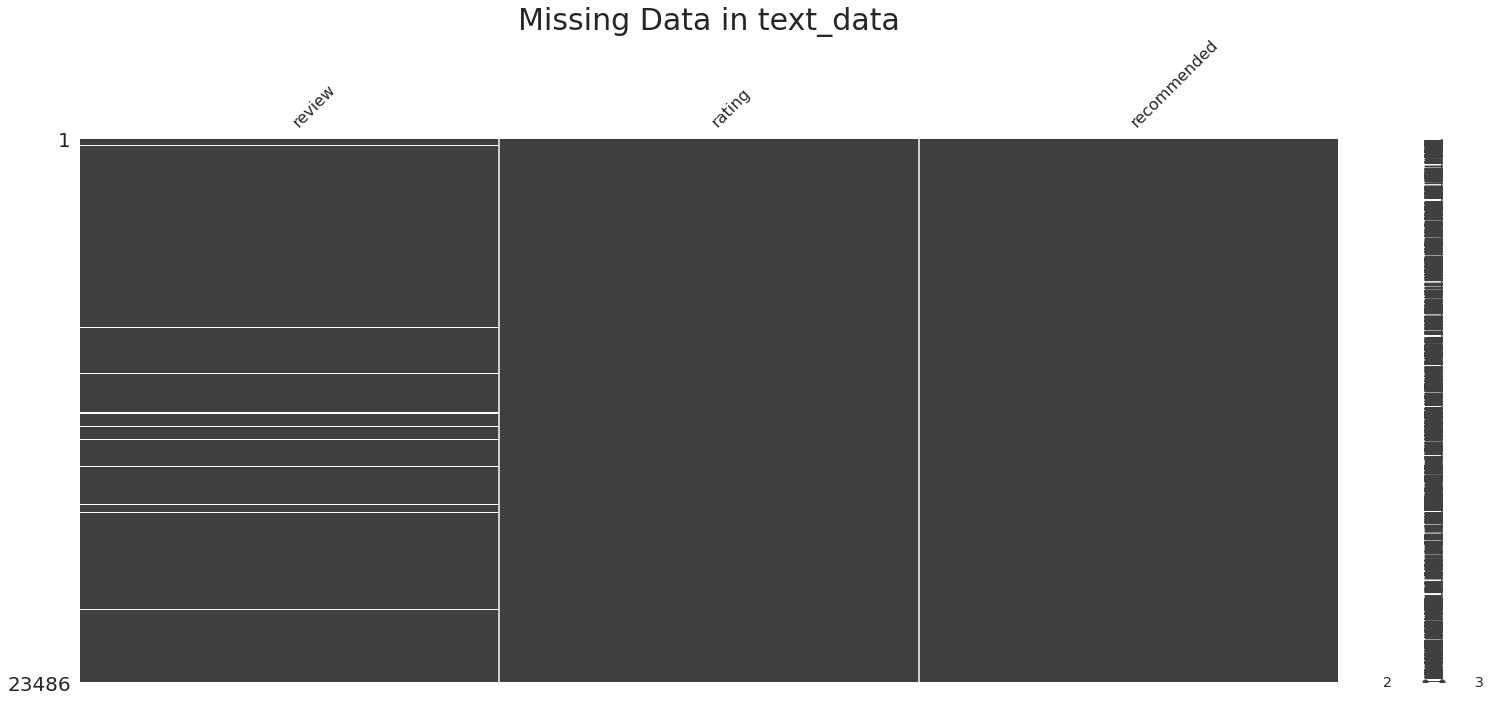

In [402]:
handle_msno(data,text_data)

## 1.4. Pre Processing text_data

In [403]:
#Seperating Reviews and Target Columns
reviews = text_data['review']
targets = text_data[['rating','recommended']]

In [404]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def preprocess(df):
    stop = set(stopwords.words('english'))
    X = []

    for sent in df:
        text = re.sub(r'@\w+ | http', '', sent)
        text = re.sub(r'[^a-zA-Z ]+', ' ', text).strip()
        token = word_tokenize(text.lower())
        token = [i for i in token if i not in stop]
        text = ' '.join(token)
        X.append(text)
    return X

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [405]:
tf = TfidfVectorizer(min_df = 0.01, max_df=0.8)
new_reviews = tf.fit_transform(preprocess(reviews)).toarray()

In [406]:
new_reviews = pd.DataFrame(new_reviews,columns=tf.get_feature_names())

In [407]:
new_reviews

,able,absolutely,across,actually,add,adds,adorable,agree,almost,already,also,although,always,amazing,ankle,another,anything,area,arm,arms,around,arrived,athletic,available,away,back,bad,baggy,based,beautiful,beautifully,belt,best,better,big,bigger,bit,black,blouse,blue,...,vibrant,waist,waisted,wait,want,wanted,wardrobe,warm,wash,washed,way,wear,wearing,weather,wedding,weight,weird,well,went,white,wide,winter,wish,without,wonderful,wore,work,worked,works,worn,worth,would,xl,xs,xxs,year,years,yellow,yet,zipper
0,0.000000,0.576845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.710553,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.263710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.174931,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.146936,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225721
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.185367,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.167001,0.0,0.0,0.000000,0.0,0.0,0.208174,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
22637,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
22638,0.312821,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.187909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.340418,0.0,0.0,0.000000

# Exploratory Data Analysis

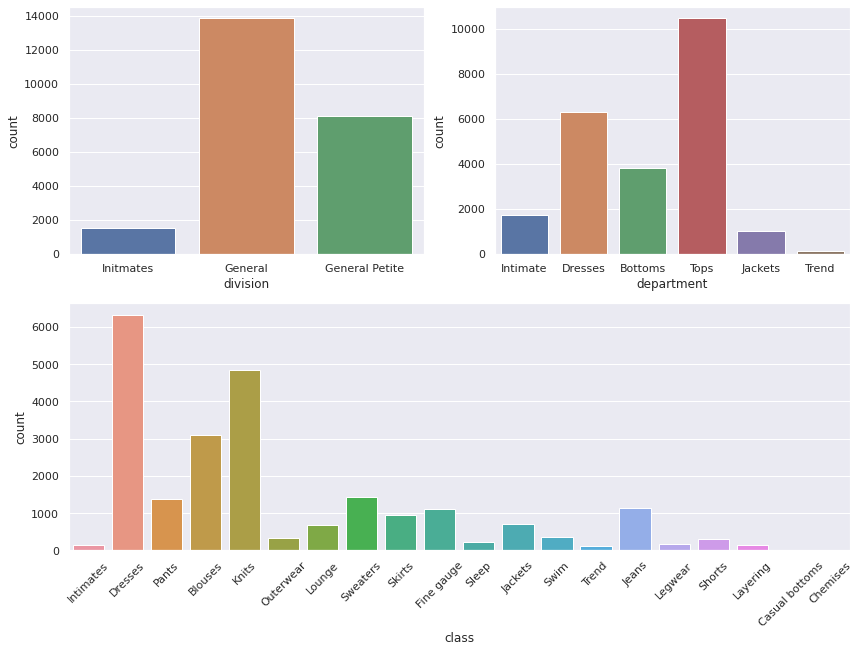

In [408]:
plt.figure(figsize=(14,10))
a1 = plt.subplot2grid((2,2),(0,0))
a1 = sns.countplot(x = data['division'])

a2 = plt.subplot2grid((2,2),(0,1))
a2 = sns.countplot(x = data['department'])

a3 = plt.subplot2grid((2,2),(1,0), colspan = 2)
a3 = sns.countplot(x = data['class'])
a3 = plt.xticks(rotation = 45)

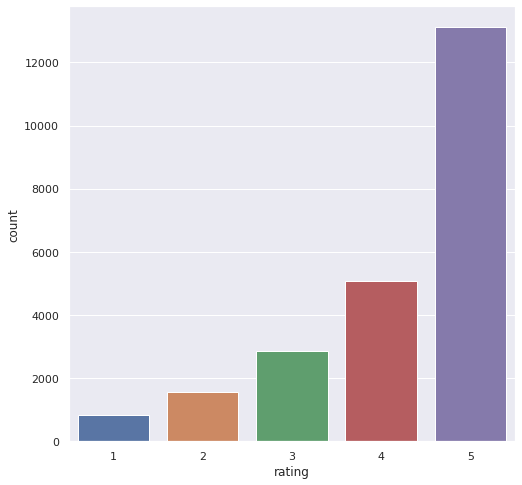

In [409]:
plt.figure(figsize=(8,8))
sns.countplot(x = data['rating'])

### From the above plot it can be said that most customers are satisfied with the product.

(array([ 646., 1770., 3647., 4562., 3204., 3316., 2117., 2000., 1326.,
         555.,  190.,   58.,   61.,   15.,    5.]),
 array([18. , 23.4, 28.8, 34.2, 39.6, 45. , 50.4, 55.8, 61.2, 66.6, 72. ,
        77.4, 82.8, 88.2, 93.6, 99. ]),
 <a list of 15 Patch objects>)

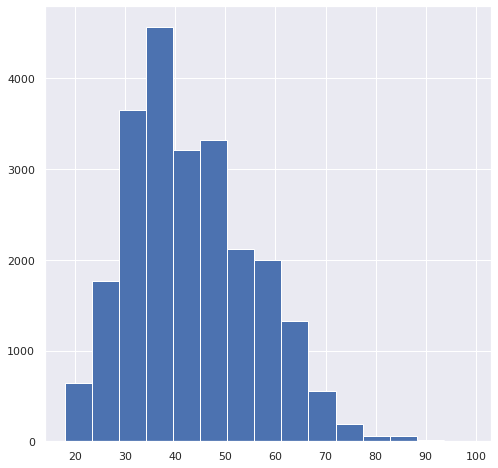

In [410]:
plt.figure(figsize=(8,8))
plt.hist(data['age'],bins = 15)

### From the above graph its pretty clear that the most review age group is between 35 - 40 and the most actively reviewing age group is 25 - 66

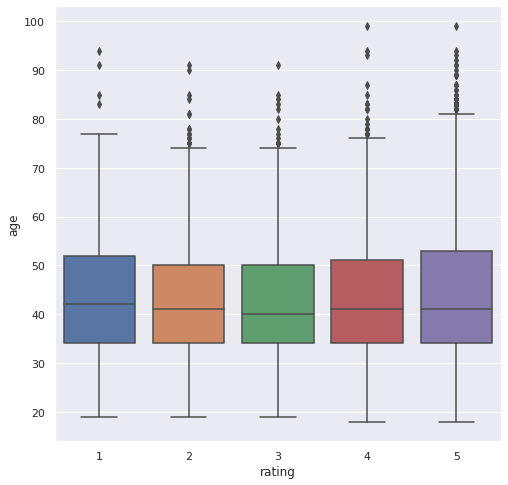

In [411]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'rating', y = 'age', data = data)

### Looking at the boxplot we can say that their doesn't exists an age group that is more satisfied than the other since upper and lower quartiles along with median are almost similar for all

In [412]:
r = data[data['recommended']==1]
nr = data[data['recommended']==0]

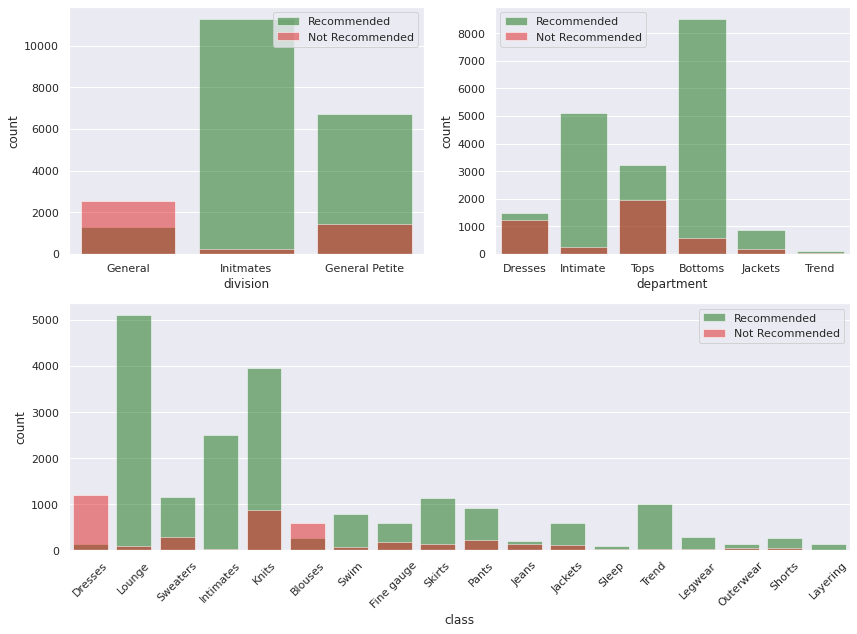

In [413]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(x = r['division'], color="green", alpha = 0.5, label = "Recommended")
ax1 = sns.countplot(x = nr['division'], color="red", alpha = 0.5,label = "Not Recommended")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(r['department'], color="green", alpha = 0.5, label = "Recommended")
ax2 = sns.countplot(nr['department'], color="red", alpha = 0.5, label = "Not Recommended")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = sns.countplot(r['class'], color = "green", alpha = 0.5, label = "Recommended")
ax3 = sns.countplot(nr['class'], color = "red", alpha = 0.5, label = "Not Recommended")
ax3 = plt.xticks(rotation=45)
ax3 = plt.legend()

### Class Dress and Blouses is usually not recommended by customers as much as they are recommended, also Intimates Division are more likely to be recommended.

# Predictive Analysis

In [414]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [415]:
targets['rating'] = targets['rating'].apply(lambda x: 2 if x>=4 else (1 if x==3 else 0))

In [416]:
trainX,testX,trainY,testY = train_test_split(new_reviews,targets['rating'],random_state = 0)

In [417]:
clf = RandomForestClassifier(random_state = 1)

In [418]:
clf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [419]:
accuracy_score(trainY,clf.predict(trainX))

0.9999411071849235

In [420]:
accuracy_score(testY,clf.predict(testX))

0.7850203144320791